# Practical Exercise with MNIST Example

In [2]:
!pip install torch

     |████████████████████████████████| 108.8 MB 75 kB/s  eta 0:00:01    |████████████████                | 54.6 MB 8.2 MB/s eta 0:00:07     |███████████████████▎            | 65.4 MB 8.0 MB/s eta 0:00:06


In [11]:
!pip install torchvision

     |████████████████████████████████| 1.0 MB 1.7 MB/s eta 0:00:01


In [3]:
import torch
import torch.nn

In [4]:
import sys
import numpy as np
import matplotlib.pyplot as plt

from model import ImageClassifier
from utils import load_mnist

In [13]:
model_fn = "./mode.pth" # "./model.pth"

In [6]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [7]:
def load(fn, device):
    d = torch.load(fn, map_location=device)
    
    return d['model']

In [8]:
def plot(x, y_hat):
    for i in range(x.size(0)):
        img = (np.array(x[i].detach().cpu(), dtype='float')).reshape(28,28)

        plt.imshow(img, cmap='gray')
        plt.show()
        print("Predict:", float(torch.argmax(y_hat[i], dim=-1)))

In [9]:
def test(model, x, y, to_be_shown=True):
    model.eval()
    
    with torch.no_grad():
        y_hat = model(x)

        correct_cnt = (y.squeeze() == torch.argmax(y_hat, dim=-1)).sum()
        total_cnt = float(x.size(0))
        
        accuracy = correct_cnt / total_cnt
        print("Accuracy: %.4f" % accuracy)
        
        if to_be_shown:
            plot(x, y_hat)

Accuracy: 1.0000


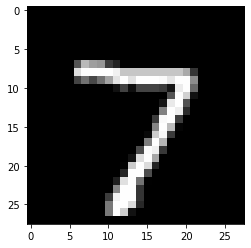

Predict: 7.0


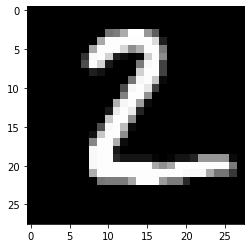

Predict: 2.0


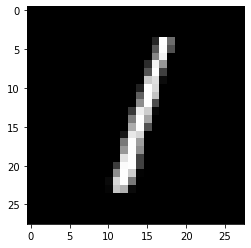

Predict: 1.0


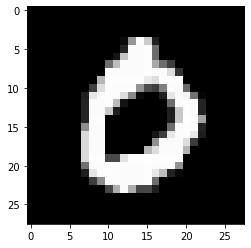

Predict: 0.0


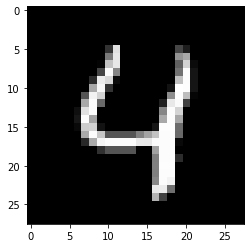

Predict: 4.0


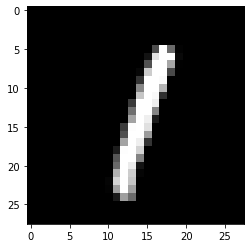

Predict: 1.0


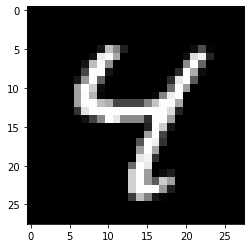

Predict: 4.0


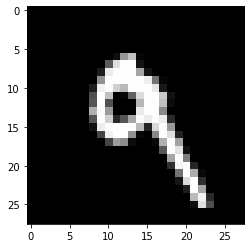

Predict: 9.0


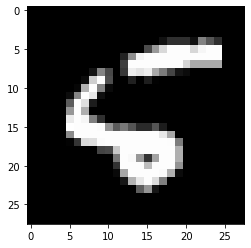

Predict: 5.0


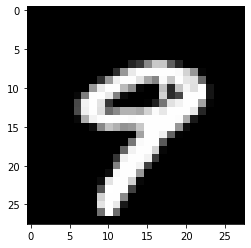

Predict: 9.0


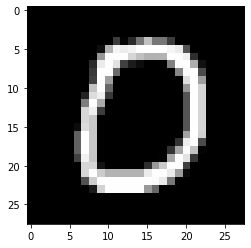

Predict: 0.0


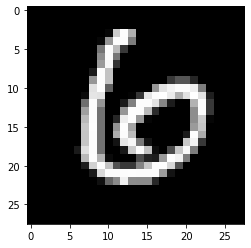

Predict: 6.0


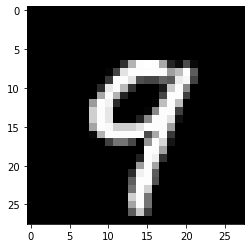

Predict: 9.0


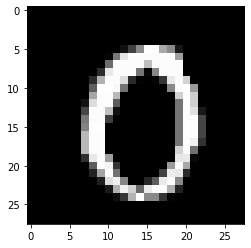

Predict: 0.0


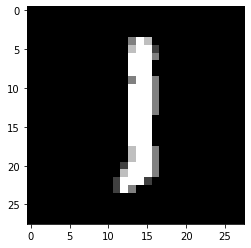

Predict: 1.0


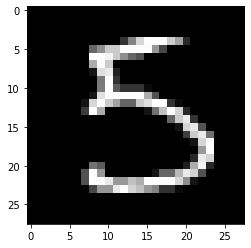

Predict: 5.0


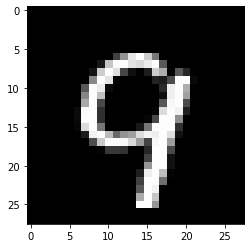

Predict: 9.0


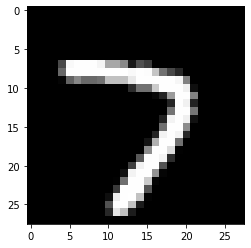

Predict: 7.0


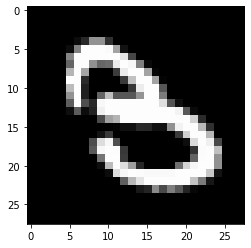

Predict: 3.0


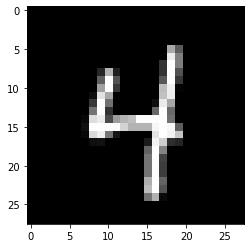

Predict: 4.0


In [14]:
# Load MNIST test set.
x, y = load_mnist(is_train=False)
# Reshape tensor to chunk of 1-d vectors.
x = x.view(x.size(0), -1)

x, y = x.to(device), y.to(device)

model = ImageClassifier(28**2, 10).to(device)
model.load_state_dict(load(model_fn, device))

test(model, x[:20], y[:20], to_be_shown=True)